<a href="https://colab.research.google.com/github/tskmr/MIP/blob/main/lec12_%E9%80%86%E3%82%B5%E3%83%B3%E3%83%97%E3%83%AA%E3%83%B3%E3%82%B0%E3%81%A8%E3%83%AF%E3%82%A4%E3%83%96%E3%83%AB%E6%8E%A8%E5%AE%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
library(tidyverse)

set.seed(12345)
n = 300
mu = 10
sigma = 0.25

eta = exp(mu)
set.seed(1234)
u = runif(n)
t.org = sort(rweibull(n, shape = 1/sigma, scale = eta))
tau = 20000
t.org

[1]  4072.738  4509.303  6003.279  6673.496  6938.151  7223.249  7733.129
  [8]  8201.875  8326.266  8476.153  8535.615  8597.684  8662.955  8871.860
 [15]  9048.673  9405.763  9499.176  9580.843  9893.270 10154.164 10182.075
 [22] 10297.911 10420.377 10516.282 10584.161 10638.408 10796.394 11197.579
 [29] 11331.802 11418.603 11425.639 11459.558 11653.134 11711.767 11800.713
 [36] 11820.305 12061.842 12083.037 12111.023 12286.710 12719.264 13071.915
 [43] 13099.628 13102.285 13179.330 13205.035 13227.829 13538.028 13600.889
 [50] 13657.912 13678.594 13845.543 14088.315 14279.769 14286.493 14342.159
 [57] 14343.510 14364.389 14462.523 14481.739 14504.313 14719.415 14789.431
 [64] 14821.084 14971.400 14991.720 15054.942 15116.628 15171.081 15262.622
 [71] 15304.641 15334.708 15472.486 15473.715 15620.725 15631.495 15634.948
 [78] 15651.949 15772.266 15785.204 15867.694 15878.359 15913.517 15955.071
 [85] 15975.546 15999.098 16114.058 16154.780 16178.418 16198.498 16216.232
 [92] 16251.823 16318.378 16398.395 16427.504 16453.762 16474.385 16592.620
 [99] 16607.707 16869.593 16974.350 17075.363 17162.540 17238.812 17254.133
[106] 17322.880 17343.270 17349.539 17442.197 17449.628 17539.863 17561.907
[113] 17593.046 17628.059 17651.401 17676.148 17678.925 17700.096 17716.389
[120] 17720.447 17728.515 17731.670 17755.023 17803.247 17846.981 18031.637
[127] 18120.195 18153.055 18233.240 18234.637 18234.660 18235.272 18243.529
[134] 18278.650 18375.877 18419.619 18433.292 18448.882 18521.483 18535.155
[141] 18556.761 18593.720 18631.380 18678.186 18683.438 18728.919 18735.858
[148] 18771.380 19013.091 19018.811 19032.064 19039.416 19152.409 19175.941
[155] 19214.407 19251.090 19290.582 19352.094 19390.993 19419.628 19531.569
[162] 19566.538 19755.252 19847.463 19851.846 19890.712 19908.805 19927.037
[169] 20071.946 20133.606 20273.352 20290.070 20494.317 20573.232 20673.148
[176] 20785.654 20908.090 20970.993 21077.324 21149.995 21172.398 21237.676
[183] 21253.414 21302.480 21306.704 21317.154 21375.700 21395.867 21426.831
[190] 21438.874 21443.869 21466.759 21507.209 21558.966 21591.692 21622.445
[197] 21651.574 21671.477 21742.537 21756.034 21840.849 21841.455 21932.564
[204] 21952.633 21960.906 21999.284 22036.931 22048.628 22090.754 22169.844
[211] 22191.147 22212.496 22250.404 22322.838 22379.588 22459.142 22466.608
[218] 22481.797 22569.779 22606.286 22907.215 22945.268 22985.698 23046.553
[225] 23148.590 23245.254 23468.817 23525.028 23525.930 23604.262 23643.488
[232] 23772.387 23819.895 23857.161 23939.062 23954.428 24045.497 24090.694
[239] 24188.269 24370.510 24508.969 24509.794 24528.176 24646.143 24694.787
[246] 24787.444 24810.521 24835.670 24840.131 24873.732 24908.156 24940.062
[253] 24953.161 24960.954 24992.199 25030.412 25077.544 25302.742 25475.739
[260] 25517.460 25692.437 25719.999 25777.058 25940.150 26033.465 26067.717
[267] 26174.308 26262.019 26310.943 26377.115 26521.533 26579.484 26645.940
[274] 26707.486 26834.171 26907.842 26981.244 27109.506 27354.184 27493.239
[281] 27634.213 27983.967 28517.166 28551.729 28789.374 28971.384 28997.797
[288] 29230.188 29513.336 29514.335 29565.328 29579.989 29855.286 29894.360
[295] 30299.634 31094.637 31927.900 34125.911 34678.029 36327.130

In [7]:
tau = 20000
t = ifelse(t.org>tau, tau, t.org)
dj = ifelse(t.org>tau, 0, 1)
rj = 1-dj

d = data.frame(t=t, dj=dj, rj=rj)
d
# write.csv(d, "data.csv")

n = length(d$t)

t,dj,rj
<dbl>,<dbl>,<dbl>
4072.738,1,0
4509.303,1,0
6003.279,1,0
6673.496,1,0
6938.151,1,0
7223.249,1,0
7733.129,1,0
8201.875,1,0
8326.266,1,0


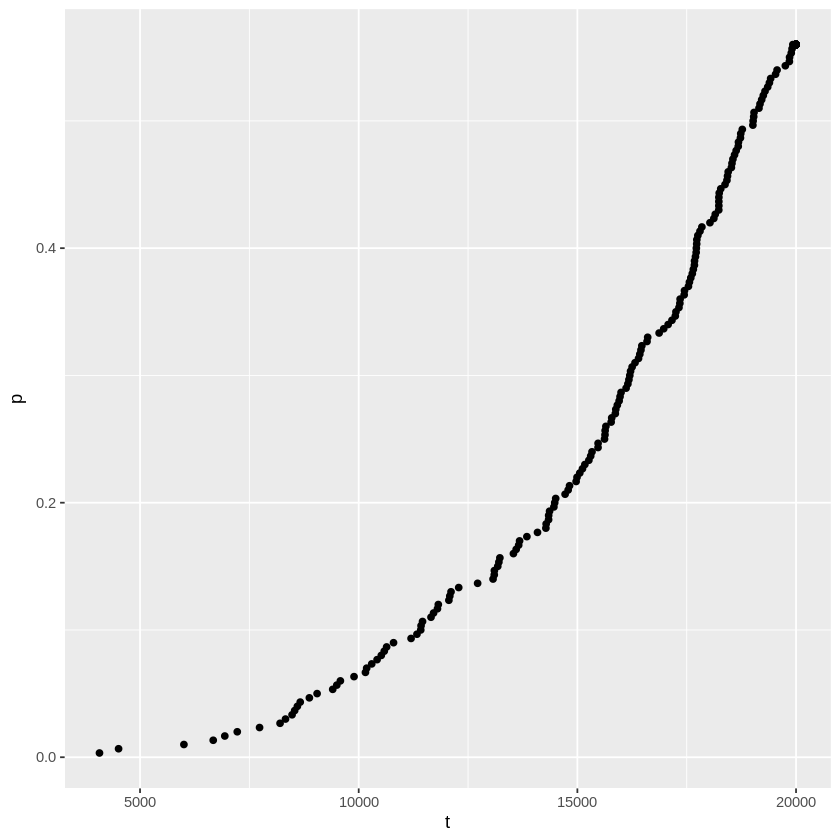

In [8]:
kaplan.meier = function(t, dj){
  nj = rev(seq_along(t))
  p = dj/nj
  q = 1 - p
  CDF = 1- cumprod(q)
  CDF
}
d = d %>% mutate(p = kaplan.meier(t, dj)) %>% data.frame
d %>% ggplot() + geom_point(aes(t, p))
# ggsave("1-a.pdf", w=6, h=4)


Loading required package: patchwork

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘patchwork’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



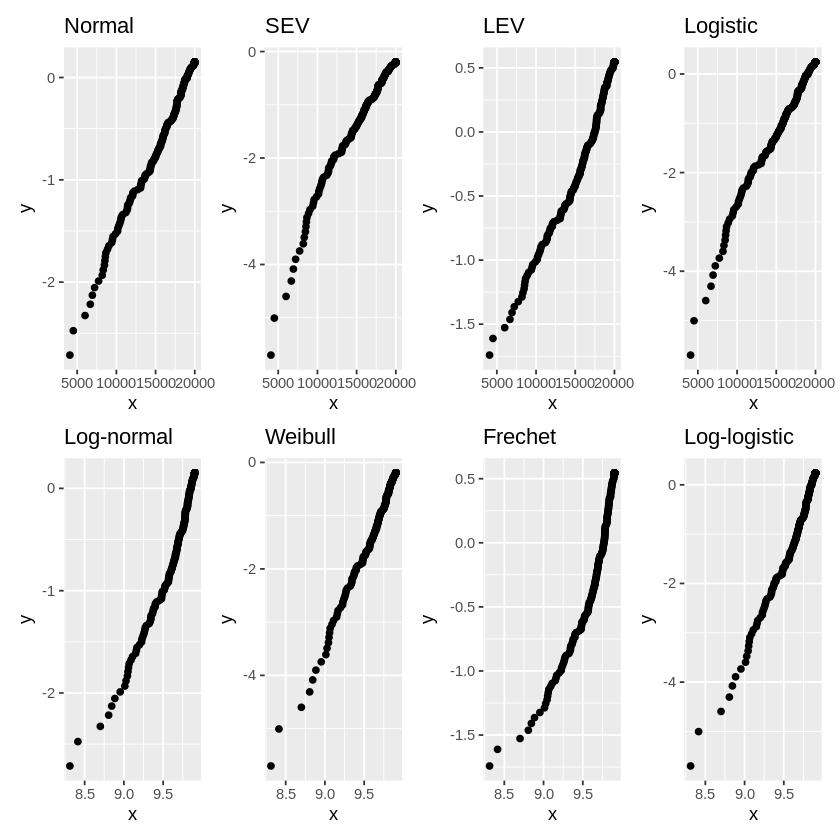

In [9]:
t = d$t
p = d$p

PhiInv_norm = function(p){ qnorm(p) }
PhiInv_sev = function(p){ log(-log(1-p)) }
PhiInv_lev = function(p){ -log(-log(p)) }
PhiInv_logis = function(p){ log(p/(1-p)) }

pN = data.frame(x = t, y = PhiInv_norm(p)) %>%
  ggplot() + geom_point(aes(x, y)) + ggtitle("Normal")
pS = data.frame(x = t, y = PhiInv_sev(p)) %>%
  ggplot() + geom_point(aes(x, y)) + ggtitle("SEV")
pL = data.frame(x = t, y = PhiInv_lev(p)) %>%
  ggplot() + geom_point(aes(x, y)) + ggtitle("LEV")
pLogis = data.frame(x = t, y = PhiInv_logis(p)) %>%
  ggplot() + geom_point(aes(x, y)) + ggtitle("Logistic")

pLN = data.frame(x = log(t), y = PhiInv_norm(p)) %>%
  ggplot() + geom_point(aes(x, y)) + ggtitle("Log-normal")
pW = data.frame(x = log(t), y = PhiInv_sev(p)) %>%
  ggplot() + geom_point(aes(x, y)) + ggtitle("Weibull")
pF = data.frame(x = log(t), y = PhiInv_lev(p)) %>%
  ggplot() + geom_point(aes(x, y)) + ggtitle("Frechet")
pLL = data.frame(x = log(t), y = PhiInv_logis(p)) %>%
  ggplot() + geom_point(aes(x, y)) + ggtitle("Log-logistic")

if(!require(patchwork)) install.packages("patchwork")
library(patchwork)
wrap_plots(pN, pS, pL, pLogis, pLN, pW, pF, pLL, ncol=4)
# ggsave("1-b.pdf", w=10, h=4)


In [10]:
dsev = function(z){
  exp(z-exp(z))
}
psev = function(z){
  1-exp(-exp(z))
}
ft = function(t, par){
  mu = par[1]
  sigma = par[2]
  if(sigma<0) return(0)
  1/t/sigma * dsev((log(t) - mu)/sigma)
}
Ft = function(t, par){
  mu = par[1]
  sigma = par[2]
  psev((log(t) - mu)/sigma)
}
l_i = function(t, par, n_d, n_r){
  n_d * log(ft(t, par)) + n_r * log(1-Ft(t, par))
}
loglikelihood = function(t, n_d, n_r){
  function(par){
    sum(l_i(t, par, n_d, n_r))
  }
}

l = loglikelihood(d$t, d$dj, d$rj)
res = optim(c(10, 1), l, control= list(fnscale = -1), hessian = TRUE)
res$par


[1] 9.9565139 0.2615736

In [11]:
Hn = res$hessian # ヘッセ行列の推定値
hat.FI = -Hn # 観測フィッシャー情報行列の推定値
hat.aVar = solve(hat.FI) # 逆行列を求めて，プラグイン漸近分散を得る
diag(hat.aVar)

hat.mu = res$par[1] # muの最尤推定値
z = qnorm(0.975) # 標準正規分布の上側0.025%点
c(hat.mu - z * sqrt(hat.aVar[1,1]),
hat.mu + z * sqrt(hat.aVar[1,1]))

hat.sigma = res$par[2] # muの最尤推定値
z = qnorm(0.975) # 標準正規分布の上側0.025%点
c(hat.sigma - z * sqrt(hat.aVar[2,2]),
hat.sigma + z * sqrt(hat.aVar[2,2]))



[1] 0.0004656614 0.0003441891

[1] 9.914219 9.998808

[1] 0.2252117 0.2979355

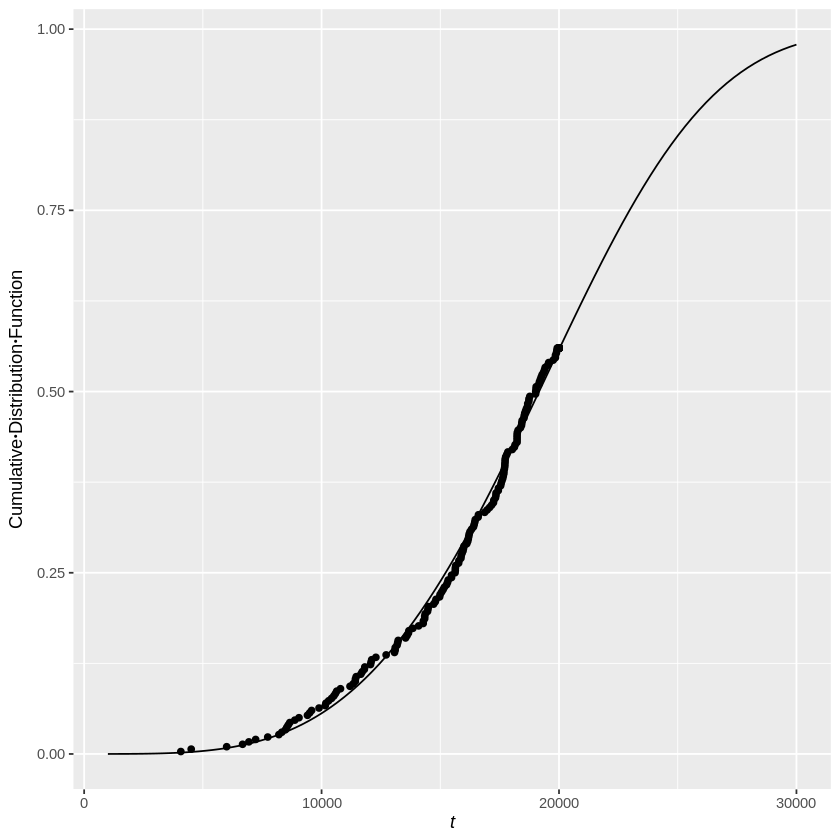

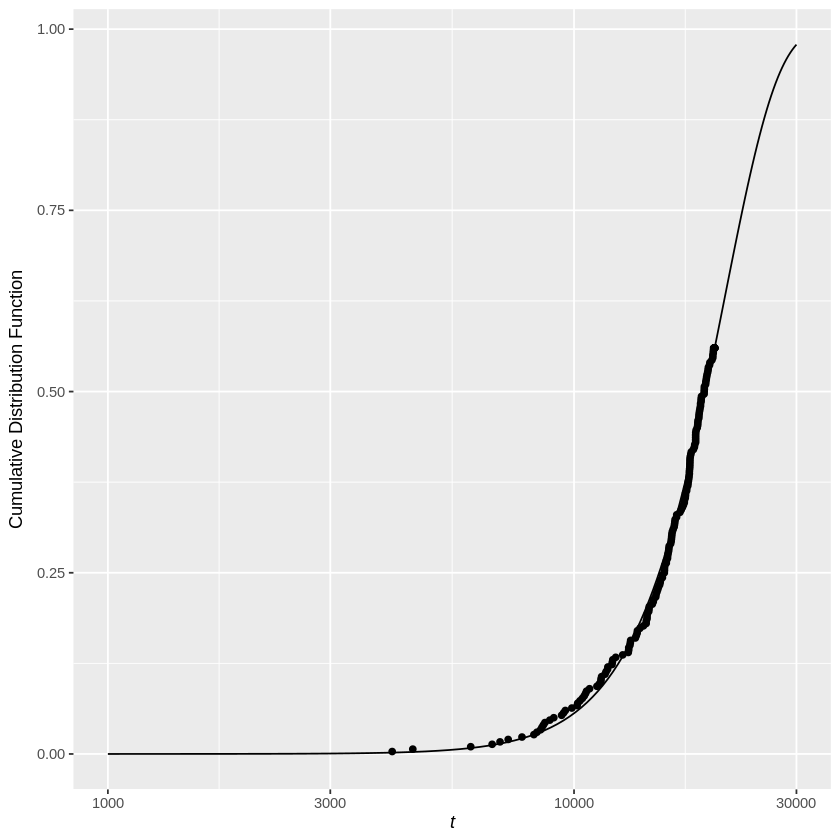

In [13]:
mu = hat.mu
sigma = hat.sigma
aVar = hat.aVar

calc.dFT = function(t){
  hat.F = Ft(t, c(mu, sigma))
  dFT = data.frame(t, mean=hat.F)
  # dFT = dFT %>% mutate(upper = ifelse(upper>1, 1, upper), lower=ifelse(lower<0, 0, lower))
  plot = dFT %>%
    ggplot()+geom_line(aes(t, mean))+
    xlab(bquote(italic(t)))+ylab("Cumulative␣Distribution␣Function")+
    geom_point(data = d, aes(t, p))
  print(plot)
  dFT
}

dFTs = calc.dFT(t = seq(1000, 30000, len=100))

plot = ggplot() +
  xlab(bquote(italic(t)))+ylab("Cumulative Distribution Function")+
  geom_point(data = d, aes(t, p))+
  scale_x_log10()
plot = plot +
  geom_line(data=dFTs, aes(t, mean))
print(plot)
# ggsave("3-a.pdf", w=6, h=4)


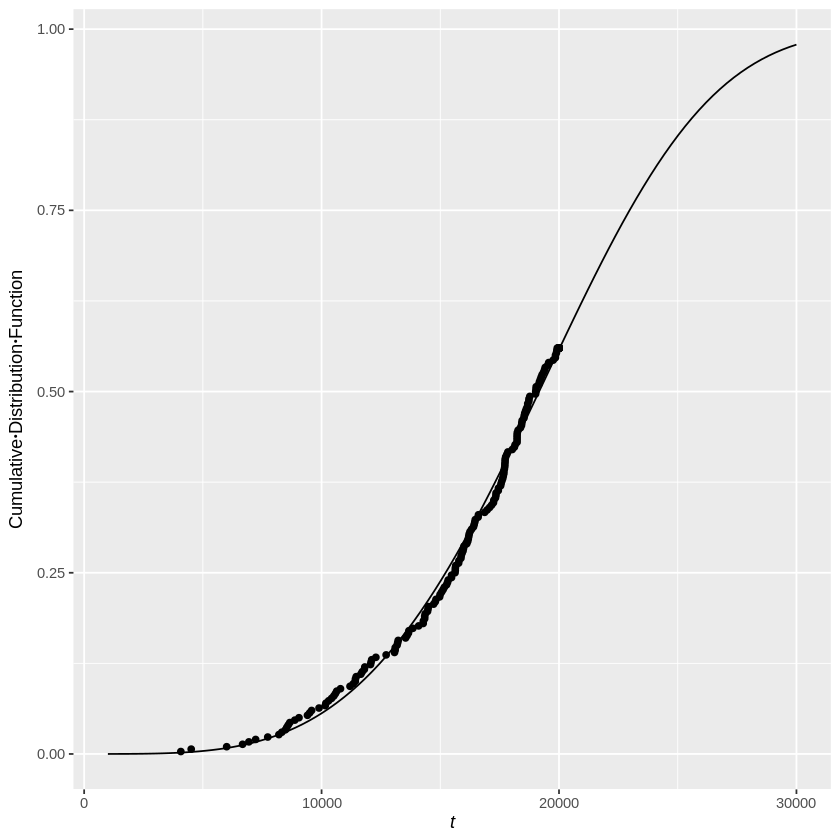

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 17 rows containing missing values or values outside the scale range
(`geom_line()`).”


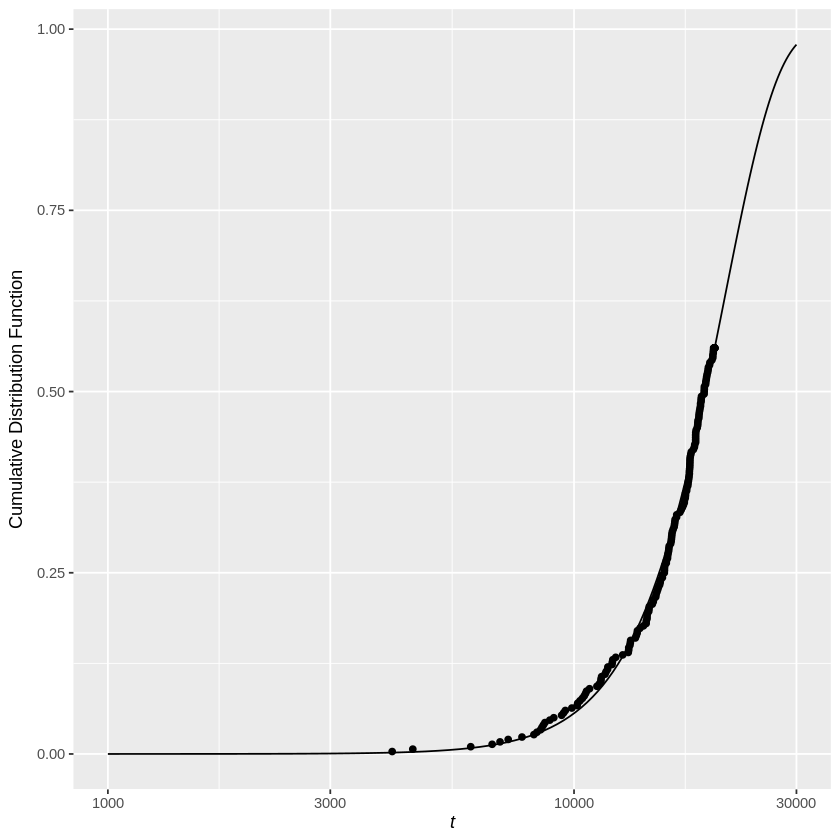

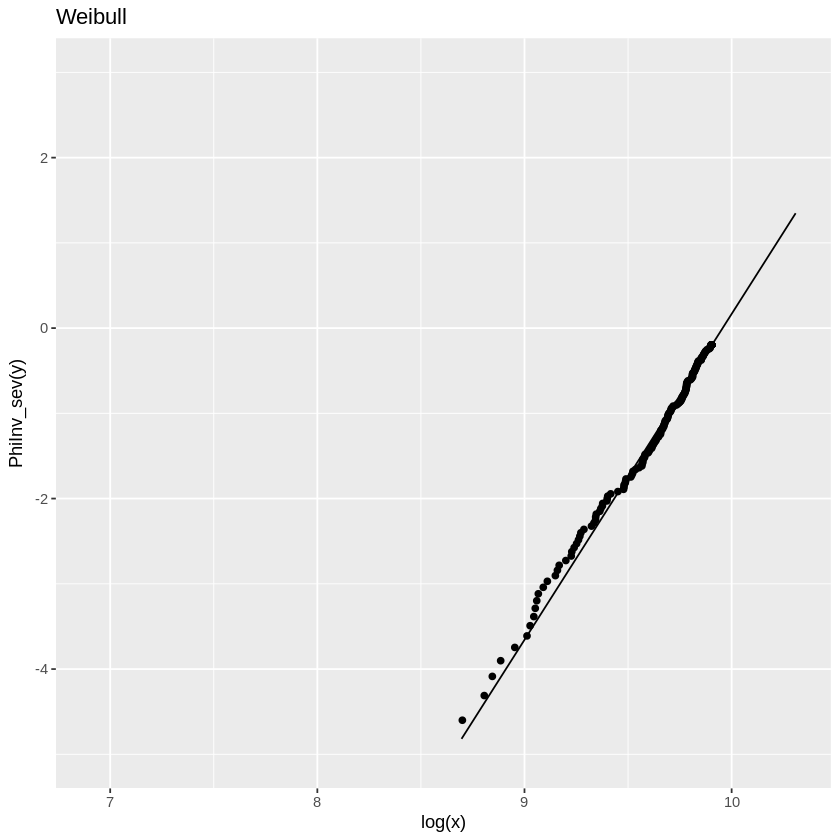

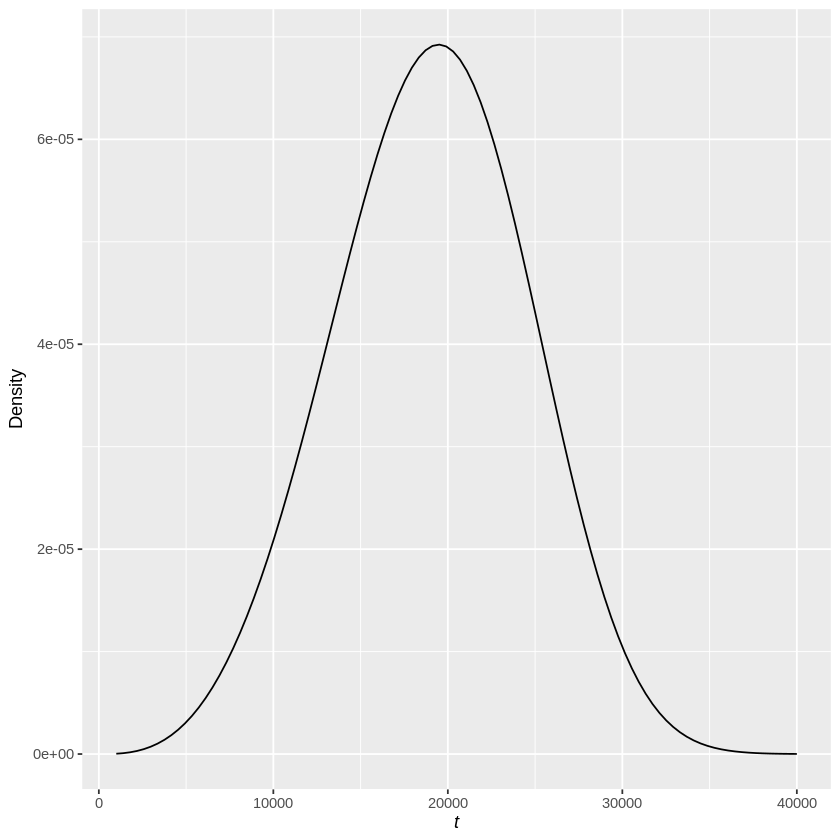

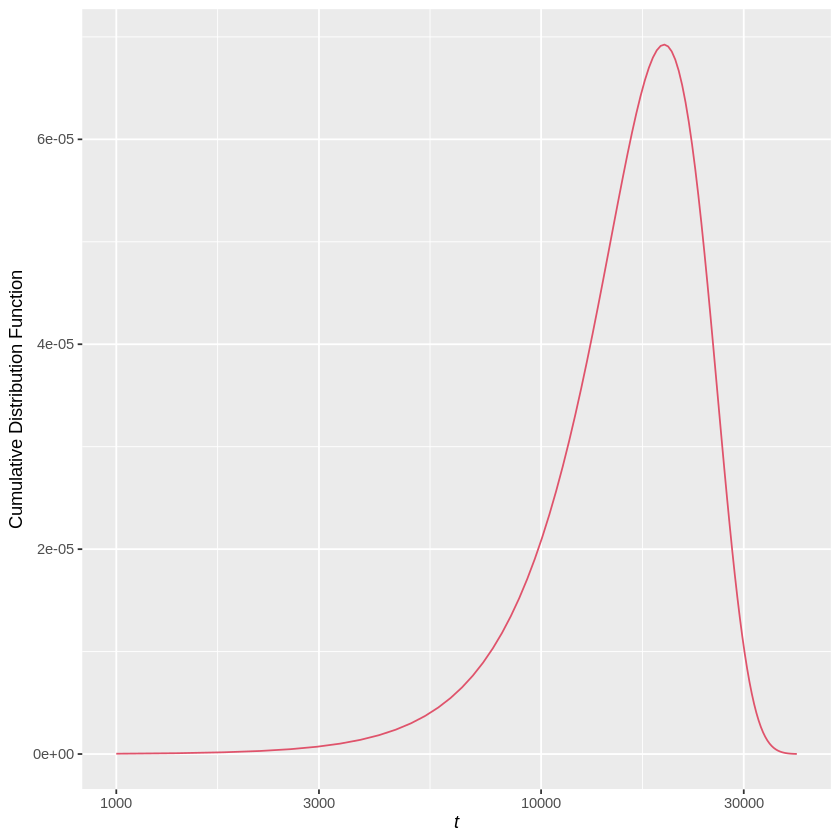

In [12]:



data.frame(x = d$t, y = d$p) %>%
  ggplot() + geom_point(aes(log(x), PhiInv_sev(y))) + ggtitle("Weibull")+
  geom_line(data = dFTs, aes(log(t), PhiInv_sev(mean))) +
  ylim(-5, 3)
# ggsave("3-b.pdf", w=6, h=4)





calc.dft = function(t){
  hat.f = ft(t, c(mu, sigma))
  dft = data.frame(t, mean=hat.f)
  # dFT = dFT %>% mutate(upper = ifelse(upper>1, 1, upper), lower=ifelse(lower<0, 0, lower))
  plot = dft %>%
    ggplot()+geom_line(aes(t, mean))+
    xlab(bquote(italic(t)))+ylab("Density")
  print(plot)
  dft
}

dfts = calc.dft(t = seq(1000, 40000, len=100))

plot = ggplot() +
  xlab(bquote(italic(t)))+ylab("Cumulative Distribution Function")+
  # geom_histogram(data = d, aes(t, ..density..))+
  scale_x_log10()
plot = plot +
    geom_line(data=dfts, aes(t, mean), col=2)
print(plot)
# ggsave("3-a.pdf", w=6, h=4)




#
# Jacobian = function(t, aTemp, beta0, beta1, sigma, h = 0.00001){
#   j1 = (Ft(t, aTemp, c(beta0+h, beta1, sigma)) - Ft(t, aTemp, c(beta0-h, beta1, sigma)))/(2*h)
#   j2 = (Ft(t, aTemp, c(beta0, beta1+h, sigma)) - Ft(t, aTemp, c(beta0, beta1-h, sigma)))/(2*h)
#   j3 = (Ft(t, aTemp, c(beta0, beta1, sigma+h)) - Ft(t, aTemp, c(beta0, beta1, sigma-h)))/(2*h)
#   matrix(c(j1, j2, j3), ncol=3)
# }
#
# calc.dFT = function(t, temp){
#   aTemp = arrhenius(temp)
#   hat.F = Ft(t, aTemp, c(beta0, beta1, sigma))
#   J = Jacobian(t, aTemp, beta0, beta1, sigma)
#   tJ = t(J)
#   var.F = sapply(1:length(t), function(i) J[i,]%*%aVar%*%tJ[,i])
#   var.F
#
#   dFT = data.frame(
#     t, temp= temp,
#     mean=hat.F,
#     upper=hat.F+qnorm(0.975)*sqrt(var.F),
#     lower=hat.F-qnorm(0.975)*sqrt(var.F))
#   dFT = dFT %>% mutate(upper = ifelse(upper>1, 1, upper), lower=ifelse(lower<0, 0, lower))
#   plot = dFT %>%
#     ggplot()+geom_line(aes(t, mean))+
#     geom_line(aes(t, upper), linetype=2)+
#     geom_line(aes(t, lower), linetype=2)+
#     xlab(bquote(italic(t)))+ylab("Cumulative␣Distribution␣Function")+
#     geom_point(data = d, aes(t, p))
#   print(plot)
#   dFT
# }
#
# dFTs = data.frame()
# dFTs = rbind(dFTs, calc.dFT(t = seq(1, 1000, len=100), temp = temp_i[1]))
# dFTs = rbind(dFTs, calc.dFT(t = seq(1, 100, len=100), temp = temp_i[2]))
# dFTs = rbind(dFTs, calc.dFT(t = seq(1, 10, len=100), temp = temp_i[3]))
# dFTs = rbind(dFTs, calc.dFT(t = seq(0.1, 3, len=100), temp = temp_i[4]))
# dFTs = rbind(dFTs, calc.dFT(t = seq(0.1, 1, len=100), temp = temp_i[5]))
#
# plot = ggplot() +
#   xlab(bquote(italic(t)))+ylab("Cumulative␣Distribution␣Function")+
#   geom_point(data = d, aes(t, p, col=temp))+
#   scale_x_log10()
# for(i in temp_i){
#   plot = plot +
#     geom_line(data=dFTs %>% filter(temp == i), aes(t, mean, col=temp))+
#     geom_line(data=dFTs %>% filter(temp == i), aes(t, upper, col=temp), linetype=2)+
#     geom_line(data=dFTs %>% filter(temp == i), aes(t, lower, col=temp), linetype=2)
# }
# print(plot)
# ggsave("3-a.pdf", w=6, h=4)
#
#
#
# B = 2000
# n = nrow(d)
# d.bootstrap = list()
# for(j in 1:B){
#   index = sort(sample(1:n, n, replace = TRUE))
#   d.bootstrap[[j]] = d[index, ]
# }
# # head(d.bootstrap[[1]])
# # head(d.bootstrap[[2000]])
#
#
#
#
# theta.bootstrap = matrix(NA, ncol=3, nrow = B)
# for(j in 1:B){
#   dB = d.bootstrap[[j]]
#   mle.bootstrap = optim(c(1, 1, 1), loglikelihood(dB$t, dB$aTemp, dB$dj, dB$rj), hessian =FALSE, control=list(fnscale = -1) )
#   theta.bootstrap[j, ] = matrix(mle.bootstrap$par, ncol=3)
# }
# theta.bootstrap = theta.bootstrap %>% data.frame %>% 'colnames<-'(c("beta0", "beta1", "sigma"))
#
# ggplot() + geom_point(data = theta.bootstrap, aes(beta0, beta1), alpha=.3)+
#   geom_point(data=data.frame(beta0, beta1), aes(beta0, beta1), col=2, size=4)
#
# theta.org = data.frame(mu, sigma)
# theta.bootstrap %>%
#   mutate(zmu = (mu-theta.org$mu)/sd(mu)) %>% arrange(mu) %>% mutate(p = seq_along(zmu)/B) -> theta.bootstrap
# # theta.bootstrap
#
#
# alpha = 0.05
# z.alpha = quantile(theta.bootstrap$zmu, probs = c(alpha/2, 1-alpha/2))
# # z.alpha
#
#
# theta.bootstrap %>%
#   ggplot() +
#   geom_histogram(aes(zmu)) +
#   geom_vline(xintercept = z.alpha[1], col=2, linetype=2)+
#   geom_vline(xintercept = z.alpha[2], col=2, linetype=2)
#
#
# theta.org$mu + z.alpha[1] * sqrt(hat.aVar[1,1])
# theta.org$mu + z.alpha[2] * sqrt(hat.aVar[1,1])
#
#
#
# hat.ML.F = hat.F
# phi_sev = dsev
# Phi_sev = psev
# Ft.bootstrap = matrix(NA, ncol=length(t), nrow=B)
# Z.F = matrix(NA, ncol=length(t), nrow=B)
# for(i in 1:length(t)){
#   t1 = t[i]
#   for(b in 1:B) {
#     cdf = Phi_sev((log(t1) - theta.bootstrap$mu[b]) / theta.bootstrap$sigma[b])
#     Ft.bootstrap[b, i] = cdf
#   }
#   Z.F[,i] = (Ft.bootstrap[,i]-hat.ML.F[i])/sd(Ft.bootstrap[,i])
# }
#
#
#
#
# alpha = 0.05
# z.alpha = apply(Z.F, 2, quantile, probs=c(alpha/2, 1-alpha/2), na.rm = T)
# # d.Ft.bootstrapLU =
# #   data.frame(t=t,
# #              hat.Ft = hat.ML.F,
# #              lower = hat.ML.F + z.alpha[1,]*apply(Ft.bootstrap, 2, sd),
# #              upper = hat.ML.F + z.alpha[2,]*apply(Ft.bootstrap, 2, sd))
# d.Ft.bootstrapLU =
#   data.frame(t=t,
#              hat.Ft = hat.ML.F,
#              lower = hat.ML.F + z.alpha[1,]*sqrt(var.F),
#              upper = hat.ML.F + z.alpha[2,]*sqrt(var.F))
#
#
#
# Ft.bootstrap = t(Ft.bootstrap)
# dB.Ft = cbind(t, data.frame(Ft.bootstrap[,sample(1:B, 200)])) %>%
#   pivot_longer(cols = -t)
#
#
#
#
# p = d %>% ggplot()+
#   xlim(c(0, max(d$t)*1.05))+
#   ylim(c(0,1))+
#   xlab("Kilometers")+ylab(quote(italic(p)))+
#   geom_line(data = dB.Ft, aes(t, value, group=name), alpha=.3, col="skyblue")+
#   geom_point(data = data.frame(t=d$t, km.F=d$km.F), aes(t, km.F))
#
#
# p = d %>% ggplot()+
#   xlim(c(0, max(d$t)*1.05))+
#   ylim(c(0,1))+
#   xlab("Kilometers")+ylab(quote(italic(p)))+
#   geom_line(data = dB.Ft, aes(t, value, group=name), alpha=.3, col="skyblue")+
#   geom_point(data = data.frame(t=d$t, km.F=d$km.F), aes(t, km.F))+
#   geom_line(data=d.Ft.bootstrapLU, aes(t, hat.Ft), col="red")+
#   geom_line(data=d.Ft.bootstrapLU, aes(t, lower), col="red", linetype=2)+
#   geom_line(data=d.Ft.bootstrapLU, aes(t, upper), col="red", linetype=2)
# p
# ggsave("3-b.pdf", w=6, h=4)
#
#
#
#
# # ggsave("bootstrap_kmplot1_hatF.pdf", width=8, height=6)
#
# plot = dFT %>%
#   ggplot()+
#   geom_line(aes(t, mean))+
#   geom_line(aes(t, upper), linetype=2)+
#   geom_line(aes(t, lower), linetype=2)+
#   xlab(bquote(italic(t)))+ylab("Cumulative␣Distribution␣Function")
# plot = plot +
#   geom_line(data = dB.Ft, aes(t, value, group=name), alpha=.3, col="skyblue")+
#   geom_line(data=d.Ft.bootstrapLU, aes(t, hat.Ft), col="red")+
#   geom_line(data=d.Ft.bootstrapLU, aes(t, lower), col="red", linetype=2)+
#   geom_line(data=d.Ft.bootstrapLU, aes(t, upper), col="red", linetype=2)
# plot + geom_point(data = d, aes(x = t, y = km.F))
# ggsave("3-c.pdf", w=6, h=4)
